<a href="https://colab.research.google.com/github/JaoLcs23/Face-Recognition-Library/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=48aff213cb1bb42df262f03678f0993a1f9b1cd3c4257af0cf9bce02ada8dcf1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [1]:
!pip install dlib==19.18.0

In [2]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [130]:
# Carregando a imagem do sistema de arquivos local

image_path = "Terry Crews.jpeg"

image = face_recognition.load_image_file(image_path)

In [27]:
face_locations = face_recognition.face_locations(image)

In [28]:
for face_location in face_locations:
    top, right, bottom, left = face_location
    print(f"Coordenadas do rosto: Top: {top}, Right: {right}, Bottom: {bottom}, Left: {left}")


Coordenadas do rosto: Top: 53, Right: 153, Bottom: 182, Left: 24


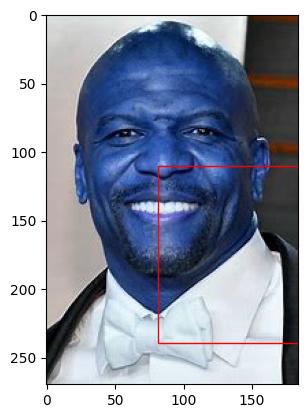

In [131]:
#Localização do Rosto a partir das coordenadas

# Converte a imagem para RGB (face_recognition usa RGB, OpenCV usa BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plota a imagem com os retângulos dos rostos detectados
plt.imshow(image_rgb)
ax = plt.gca()

for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right - left, bottom - top
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red')
    ax.add_patch(rect)

plt.show()


In [41]:
#Comparação entre duas imagens pra saber se são a mesma pessoa

# Carrega duas imagens
image1 = face_recognition.load_image_file("Terry Crews.jpeg")
image2 = face_recognition.load_image_file("Desconhecido.jpeg")

# Detecta rostos nas duas imagens
face_locations1 = face_recognition.face_locations(image1)
face_locations2 = face_recognition.face_locations(image2)

# Codifica os rostos
face_encodings1 = face_recognition.face_encodings(image1, face_locations1)
face_encodings2 = face_recognition.face_encodings(image2, face_locations2)


import numpy as np

# Converte as listas em arrays NumPy
face_encodings1_np = np.array(face_encodings1)
face_encodings2_np = np.array(face_encodings2)

# Compara os rostos
results = face_recognition.compare_faces(face_encodings1_np, face_encodings2_np)

print("Os rostos nas duas imagens são da mesma pessoa?", results)



Os rostos nas duas imagens são da mesma pessoa? [True]


In [45]:
#Coordenadas dos olhos, nariz, boca e formato do rosto

# Carrega a imagem
image = face_recognition.load_image_file("Kevin Hart.jpeg")

# Detecta rostos na imagem
face_landmarks_list = face_recognition.face_landmarks(image)

# Exibe as características faciais extraídas
for face_landmarks in face_landmarks_list:
    for feature, points in face_landmarks.items():
        print(f"Característica facial: {feature}")
        for point in points:
            print(f"Coordenadas: {point}")


Característica facial: chin
Coordenadas: (107, 113)
Coordenadas: (105, 128)
Coordenadas: (105, 142)
Coordenadas: (105, 157)
Coordenadas: (109, 171)
Coordenadas: (117, 184)
Coordenadas: (127, 195)
Coordenadas: (138, 205)
Coordenadas: (154, 209)
Coordenadas: (169, 207)
Coordenadas: (183, 200)
Coordenadas: (194, 190)
Coordenadas: (203, 178)
Coordenadas: (209, 165)
Coordenadas: (212, 150)
Coordenadas: (212, 135)
Coordenadas: (213, 121)
Característica facial: left_eyebrow
Coordenadas: (115, 101)
Coordenadas: (121, 95)
Coordenadas: (131, 94)
Coordenadas: (141, 96)
Coordenadas: (150, 100)
Característica facial: right_eyebrow
Coordenadas: (168, 101)
Coordenadas: (179, 98)
Coordenadas: (189, 98)
Coordenadas: (198, 100)
Coordenadas: (204, 107)
Característica facial: nose_bridge
Coordenadas: (159, 111)
Coordenadas: (158, 119)
Coordenadas: (158, 127)
Coordenadas: (157, 135)
Característica facial: nose_tip
Coordenadas: (144, 141)
Coordenadas: (150, 142)
Coordenadas: (156, 144)
Coordenadas: (163, 14

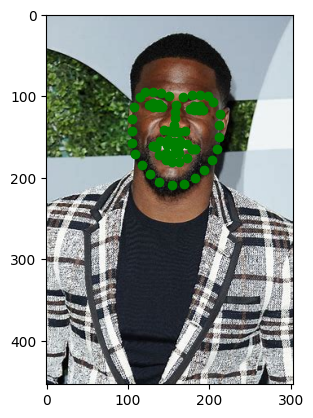

In [42]:
#Marcações da posição dos olhos, nariz, boca e formato do rosto

# Carrega a imagem
image = face_recognition.load_image_file("Kevin Hart.jpeg")

# Detecta rostos na imagem
face_landmarks_list = face_recognition.face_landmarks(image)

# Desenha as marcas faciais na imagem
plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    for facial_feature in face_landmarks.keys():
        for point in face_landmarks[facial_feature]:
            ax.plot(point[0], point[1], 'o', color='green')

plt.show()


In [48]:
#Identificação do rosto mais parecido

# Carrega imagens de rostos conhecidos e codificações correspondentes
known_face_encodings = []
known_face_names = []

# Adicione suas próprias imagens de rostos conhecidos aqui
image_path_1 = "Terry Crews.jpeg"
image_path_2 = "The Rock.jpeg"
image_path_3 = "Kevin Hart.jpeg"

image1 = face_recognition.load_image_file(image_path_1)
image2 = face_recognition.load_image_file(image_path_2)
image3 = face_recognition.load_image_file(image_path_3)

# Codifica os rostos conhecidos
encoding1 = face_recognition.face_encodings(image1)[0]
encoding2 = face_recognition.face_encodings(image2)[0]
encoding3 = face_recognition.face_encodings(image3)[0]

known_face_encodings = [encoding1, encoding2, encoding3]
known_face_names = ["Terry Crews", "The Rock", "Kevin Hart"]

# Carrega uma imagem contendo um rosto desconhecido
unknown_image = face_recognition.load_image_file("Desconhecido.jpeg")

# Codifica o rosto desconhecido
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

# Compara o rosto desconhecido com rostos conhecidos
distances = face_recognition.face_distance(known_face_encodings, unknown_encoding)

# Encontra o índice do rosto mais semelhante (o de menor distância)
closest_face_index = np.argmin(distances)

# Obtém o nome do rosto mais semelhante
closest_face_name = known_face_names[closest_face_index]

print("O rosto mais semelhante é:", closest_face_name)

O rosto mais semelhante é: Terry Crews


In [64]:
# Carrega a imagem
image_path = "The Office.jpeg"
image = face_recognition.load_image_file(image_path)

# Detecta rostos na imagem
face_locations = face_recognition.face_locations(image)

# Conta o número de rostos detectados
num_faces = len(face_locations)

print("Número de pessoas na imagem:", num_faces)


Número de pessoas na imagem: 5


In [127]:
# Carrega a imagem
image_path = "Scarlett Johansson.jpeg"
image = face_recognition.load_image_file(image_path)

# Detecta rostos na imagem
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

# Exibe as expressões faciais identificadas
for face_landmarks, face_encoding in zip(face_landmarks_list, face_encodings):
    # Calcula a distância euclidiana entre os pontos do nariz e da boca
    nose_tip = face_landmarks['nose_tip']
    top_lip = face_landmarks['top_lip']
    bottom_lip = face_landmarks['bottom_lip']
    nose_tip_mean = np.mean(nose_tip, axis=0)
    top_lip_mean = np.mean(top_lip, axis=0)
    bottom_lip_mean = np.mean(bottom_lip, axis=0)
    nose_to_lips_distance = np.linalg.norm(nose_tip_mean - top_lip_mean) + np.linalg.norm(nose_tip_mean - bottom_lip_mean)

    # Define uma expressão facial baseada na distância
    if nose_to_lips_distance >= 33:
        expression = "Sorrindo"
    else:
        expression = "Neutra"

    print("Expressão facial:", expression)


Expressão facial: Sorrindo
